# NLP Final Project 

### By: Idan Dunsky, Yaniv Kaveh-Shtul

# Imports

In [1]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
from ntscraper import Nitter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from gensim.models import Word2Vec
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Data

## Creating Dataset

In [84]:
# scraper = Nitter()

In [85]:
# def get_tweets(name,modes,no):
#   """ get No. tweets from a specified user, by mode 

#   Args:
#       name (str): username
#       modes (str): 1 of hashtag, user, term
#       no (int): number of tweets to get

#   Returns:
#       DataFrame: a Dataframe containing all tweets
#   """
#   final_tweets = []

#   tweets = scraper.get_tweets(name, mode = modes, number = no)

#   for tweet in tweets['tweets']:
#     data = [tweet['link'],tweet['text'],tweet['date'],tweet['stats']['likes'],tweet['stats']['comments']]
#     final_tweets.append(data)
#   data = pd.DataFrame(final_tweets, columns=['link', 'text','date','No_of_Likes','No_of_tweets'])
#   return data

In [86]:
# BBC = 'BBCNews'    # BBC news twitter account
# NYTIMES = 'nytimes' # New York Times twitter account
# MODE = 'user'       # scraping mode
# NUM_OF_TWEETS = 900 # Maximun num of tweets allowed


In [87]:
# bbc_df = get_tweets(BBC, MODE, NUM_OF_TWEETS)
# nytimes_df = get_tweets(NYTIMES, MODE, NUM_OF_TWEETS)

In [88]:
# bbc_df[:10]

In [89]:
# nytimes_df[:10]

### Saving data to files

In [90]:
# bbc_df.to_csv("bbc_tweets.csv")
# nytimes_df.to_csv("nytimes_tweets.csv")

## Reading data

In [2]:
BBC = './bbc_tweets.csv'
NYT = './nytimes_tweets.csv'

In [3]:
bbc_df = pd.read_csv(BBC)
nyt_df = pd.read_csv(NYT)

In [4]:
import re
bbc_corpus = [re.sub(r'http\S+', '', x) for x in bbc_df['text']]
nyt_corpus = [re.sub(r'http\S+', '', x) for x in nyt_df['text']]

In [5]:
bbc_corpus[:10]

["'You have to put in 110% to make a living' - retailer ",
 "'When people couldn't find us, GRM Daily was there' ",
 'Belfast violence: What happened at the weekend? ',
 "Scotland net zero and energy secretary Màiri McAllan gives birth to 'beautiful boy' ",
 "US markets tumble amid global sell-off as fears grow over economic slowdown in world's largest economy   Follow live ",
 "Council leader 'livid' with new housing targets ",
 'Beach cages to help protect threatened birds ',
 'Charity worker attacks neighbours with cattle prod ',
 "Ireland gymnast Rhys McClenaghan says he didn't know whether he had done enough for gold ",
 "'I now need gold in LA, but first I'm going to see Taylor Swift' "]

In [6]:
nyt_corpus[:10]

["🧵 Here's a guide to how you can keep up with The New York Times, on and off Twitter.  @nytimes shares news to help you understand the world.  @nytopinion offers crucial perspectives on the issues that matter to you.",
 "From @TheAthletic: NBC's track and field play-by-play announcer Leigh Differ apologized for getting the initial call of the men's 100m final wrong. ",
 'Olympic gymnastics would be more enjoyable on TV and in the arena if choreography were less of an afterthought, our critic writes. ',
 'From @TheAthletic: Last summer, Noah Lyles took issue with the fact that NBA champions are referred to as "world champions."   “I still don’t agree with the comment,” Devin Booker said, but he still congratulated Lyles on his thrilling 100-meter win. ',
 "From @TheAthletic: On the first day of cycling at the #OlympicGames, the Brits have just set a world record in qualifying for the women's team sprint. It's been more than 11 years since Britain won gold in this event. ",
 "Jordan Chi

# Pre-processing Data

## Tokenization

In [7]:
# nlp model that will perform all actions
nlp = spacy.load('en_core_web_sm')

In [8]:
# helper function to tokenize corpus 
def process(nlp, corpus):
    doc = [nlp(sent) for sent in corpus]
    return doc

def tokenize(processed_corpus):
    tokens = []
    for sent in processed_corpus:
        tokens.append([token for token in sent if not token.is_punct and not token.is_stop and not token.is_space])
    return tokens


In [9]:
bbc_processed_corpus = process(nlp, bbc_corpus)
nyt_processed_corpus = process(nlp, nyt_corpus)

bbc_tokens = tokenize(bbc_processed_corpus)
nyt_tokens = tokenize(nyt_processed_corpus)

## Lemmatization

In [10]:
def lemmatize(tokens):
    lemmas = []
    for sent in tokens:
        for token in sent:
            lemmas.append(token.lemma_)
    return set(lemmas)

In [11]:
bbc_lemmas = lemmatize(bbc_tokens)
nyt_lemmas = lemmatize(nyt_tokens)

In [12]:
bbc_lemmas

{'shortage',
 'grave',
 'global',
 'extreme',
 'rogue',
 'Jay',
 '54,500',
 'rail',
 'fade',
 'russian',
 'swear',
 'Redmond',
 'Downey',
 'listen',
 'shopper',
 'unveil',
 'Fascinating',
 'spree',
 'county',
 'expect',
 'record',
 'proper',
 '8',
 'DJ',
 '2020',
 'week',
 'refurbishment',
 'sharp',
 'processed',
 'Sandringham',
 'stake',
 'indecent',
 'injured',
 'interview',
 'Wars',
 'sell',
 'match',
 'England',
 'Housing',
 'flight',
 'thrill',
 'result',
 'partially',
 'national',
 'show',
 'own',
 'bee',
 'net',
 'upkeep',
 'early',
 'tell',
 'Prime',
 'affair',
 'rot',
 'plant',
 'skin',
 'horrific',
 'theft',
 'regrettable',
 'Salon',
 'Head',
 'respond',
 'z',
 'Alice',
 'wisher',
 'veteran',
 'swarm',
 'Bushey',
 'hygiene',
 'thief',
 'save',
 'parade',
 'ft',
 'Stonehenge',
 'boss',
 'hide',
 'violent',
 'West',
 'murder',
 'July',
 'person',
 'analysis',
 'de',
 'housing',
 'mile',
 'vest',
 'Motorist',
 'qualify',
 'Men',
 'control',
 'catastrophic',
 'extend',
 'holiday'

In [13]:
nyt_lemmas

{'global',
 'acknowledge',
 'grapple',
 'poolside',
 'extreme',
 'Zealand',
 '@NicoleAuerbach',
 'enormous',
 'rail',
 'glitter',
 'Cheryl',
 'russian',
 'shrug',
 'remarkable',
 'package',
 'meteor',
 'Guðni',
 'distance',
 'surrender',
 'veepstake',
 'Downey',
 'replenish',
 'listen',
 '13th',
 'prove',
 'D’Vontaye',
 'ret',
 'Navy',
 'spree',
 'county',
 'expect',
 'act',
 'record',
 '🇮',
 '2022',
 '8',
 'recognized',
 '2020',
 'week',
 'Ohio',
 'sharp',
 '20,000',
 'propia',
 'stake',
 'segregationist',
 'indecent',
 'previously',
 'interview',
 'bizarre',
 'sleeper',
 '45',
 'bureau',
 'Reeve',
 'pulmonary',
 'sell',
 'match',
 'individual',
 'able',
 '26',
 'cartwheel',
 'Lyles',
 'unsuccessfully',
 'Beret',
 'stunned',
 'surrogate',
 '1996',
 'faction',
 'England',
 'fleet',
 '@JDVance',
 'tracker',
 'adult',
 'Sup',
 'flight',
 'thrill',
 'result',
 'seventh',
 'wear',
 'cocoa',
 'feminine',
 'Perseverance',
 'Percival',
 '7:30',
 'Luttig',
 'inminente',
 'Review',
 'sicken',
 

# Statistics

## Most frequent words

we will now use the naive manual way to search the most frequent words in the corpus

In [14]:
from nltk.corpus import stopwords

def get_most_frequent_words(corpus, top_n=5):
    """Seeks and returns a list the top_n most common words in a given corpus

    Args:
        corpus (list[str]): corpus
        top_n (int, optional): number of frequent words to seek. Defaults to 5.

    Returns:
        list[str]: list of most frequent words sorted in an descending order 
    """
    # Combine all documents into one string
    combined_text = ' '.join(corpus)
    
    # Tokenize the combined text (split by whitespace and remove non-alphanumeric characters)
    words = re.findall(r'\b\w+\b', combined_text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Count the frequency of each word
    word_counts = Counter(filtered_words)
    
    # Get the top N most common words
    most_common_words = word_counts.most_common(top_n)
    
    return most_common_words

In [15]:
def most_freq(corpus, name, number = 5):
    """print the {number} most frequent words in a given corpus 

    Args:
        corpus (list[str]): corpus
        name (str): corpus name
        number (int): number of words to print
    """
    # Get the number most frequent words
    top_words = get_most_frequent_words(corpus, top_n=number)

    # Display the results
    print(f"Top 5 most frequent words in the {name}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")

In [16]:
most_freq(bbc_corpus, 'BBC')
print()
most_freq(nyt_corpus,'New-York Times')

Top 5 most frequent words in the BBC:
man: 38
new: 37
olympics: 35
says: 33
police: 29

Top 5 most frequent words in the New-York Times:
theathletic: 134
olympic: 125
new: 119
olympics: 116
u: 113


## TF-IDF most frequent


TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It combines two components: Term Frequency (TF), which measures how often a word appears in a document, and Inverse Document Frequency (IDF), which measures how common or rare a word is across the entire corpus. TF-IDF helps in identifying key terms and improving text analysis tasks like information retrieval and document classification.


we will now use the `TfidfVectorizer` in order to find the most frequent words in the corpus.

we will extract the sum of `tf` for each word by dividing the results of `TfidfVectorizer` by the `TfidfVectorizer.idf_` score, achieving the frequency of each word in the corpus.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


def tf_idf(corpus: list[str]):
    """calculates the tfidf score for each word in a given corpus

    Args:
        corpus (list[str]): the corpus for tfidf calculation

    Returns:
        tfidf_df DataFrame: data frame that holds the tfidf scores sum for each word 
    """
    # Initialize the vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus)

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Sum the TF scores for each word across all documents
    tf_scores = np.sum(X.toarray()/vectorizer.idf_, axis=0)

    # Create a DataFrame for better visualization
    tf_df = pd.DataFrame({'word': feature_names, 'tf_score': tf_scores})

    # Sort the DataFrame by TF-IDF score in descending order
    tf_df = tf_df.sort_values(by='tf_score', ascending=False)

    # Display the most frequent words based on TF-IDF scores
    return tf_df

In [18]:
bbc_tf = tf_idf(bbc_corpus)
nyt_tf = tf_idf(nyt_corpus)

In [19]:
bbc_tf

,word,tf_score
1513,man,2.575045
1697,olympics,2.539197
1654,new,2.387501
1696,olympic,1.881091
1834,police,1.797510
...,...,...
2284,special,0.028458
449,certain,0.028458
1693,olivia,0.028458
220,audiences,0.028458


In [20]:
nyt_tf

,word,tf_score
4664,theathletic,5.697987
3267,olympic,5.263748
3269,olympics,5.014122
3163,new,4.857341
2096,gold,4.256145
...,...,...
874,championships,0.019321
2041,ganna,0.019321
1887,filippo,0.019321
4580,switched,0.019321


### Frequency Bar Chart

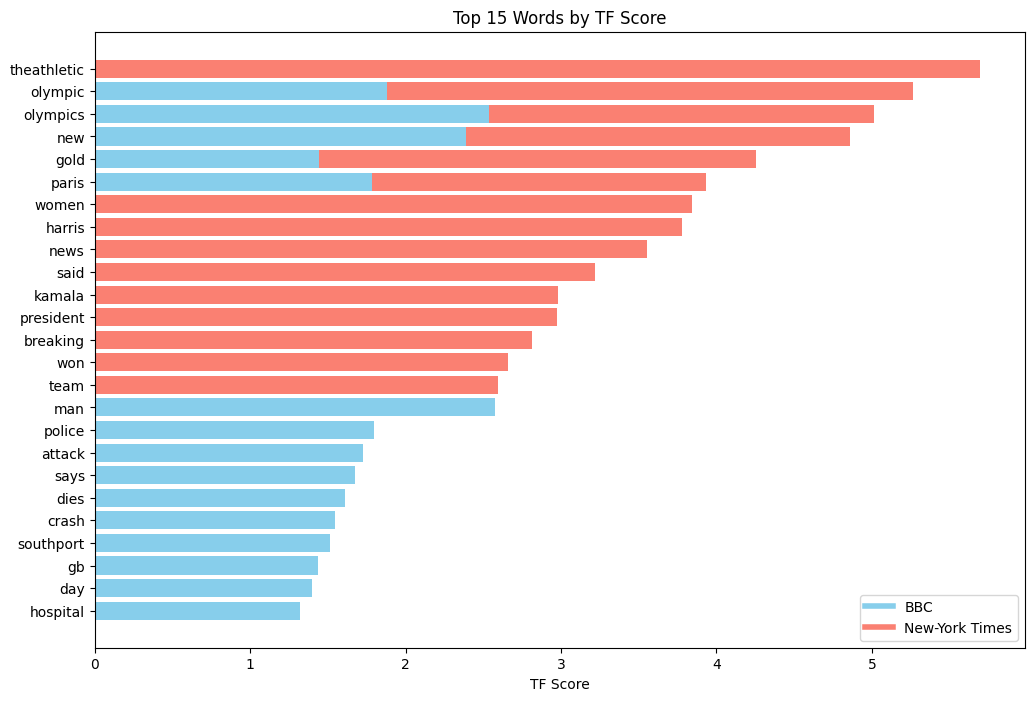

In [21]:
def plot_tfidf_bar_chart(tf_df1, tf_df2, top_n=10):
    """ plot a bar chart of the top_n words with the highest tf score in two corpora
    Args:
        tf_df1 (DataFrame): tfidf dataframe for corpus #1 
        tf_df2 (DataFrame): tfidf dataframe for corpus #2 
        top_n (int, optional): number of words to plot. Defaults to 10.
    """
    # Get the top N words by TF score for each DataFrame
    top_tf_df1 = tf_df1.head(top_n)
    top_tf_df2 = tf_df2.head(top_n)
    
    # Combine both DataFrames for plotting
    combined_df = pd.concat([top_tf_df1, top_tf_df2])
    
    # Mark the source of each word for color coding
    combined_df['source'] = ['DF1']*top_n + ['DF2']*top_n

    # Sort combined DataFrame by TF-IDF score
    combined_df = combined_df.sort_values(by='tf_score', ascending=False)

    # Create a bar chart
    plt.figure(figsize=(12, 8))
    colors = ['skyblue' if source == 'DF1' else 'salmon' for source in combined_df['source']]
    plt.barh(combined_df['word'], combined_df['tf_score'], color=colors)
    plt.xlabel('TF Score')
    plt.title(f'Top {top_n} Words by TF Score')
    plt.gca().invert_yaxis()

    # Create a legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='skyblue', lw=4, label='BBC'),
                       Line2D([0], [0], color='salmon', lw=4, label='New-York Times')]
    plt.legend(handles=legend_elements, loc='lower right')

    plt.show()


plot_tfidf_bar_chart(bbc_tf, nyt_tf, top_n=15)

### Word Cloud Frequency Chart

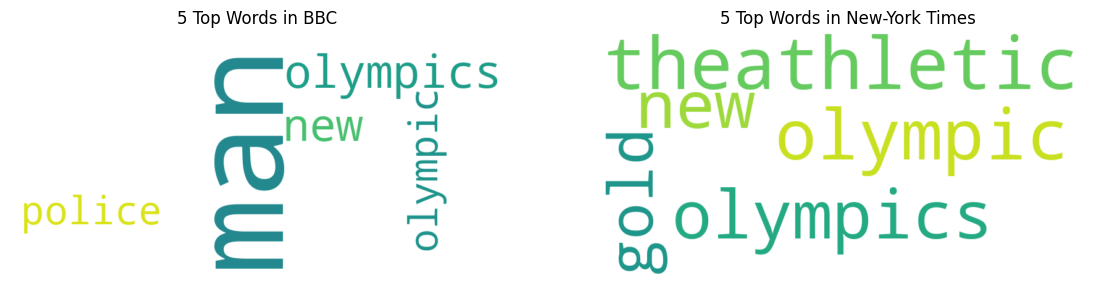

In [22]:
def plot_word_clouds(tf_df1, tf_df2, top_n=5):
    # Get the top N words by TF score for each DataFrame
    top_tf_df1 = tf_df1.head(top_n)
    top_tf_df2 = tf_df2.head(top_n)
    
    # Create dictionaries for word cloud generation
    word_freq1 = dict(zip(top_tf_df1['word'], top_tf_df1['tf_score']))
    word_freq2 = dict(zip(top_tf_df2['word'], top_tf_df2['tf_score']))
    
    # Create word clouds
    wordcloud1 = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_freq1)
    wordcloud2 = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(word_freq2)

    # Create word clouds with borders
    wordcloud1 = WordCloud(width=800, height=400, background_color='white', contour_color='black', contour_width=10).generate_from_frequencies(word_freq1)
    wordcloud2 = WordCloud(width=800, height=400, background_color='white', contour_color='black', contour_width=10).generate_from_frequencies(word_freq2)
    
    # Plot word clouds
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{top_n} Top Words in BBC')
    
    
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud2, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{top_n} Top Words in New-York Times')
    
    plt.show()


plot_word_clouds(bbc_tf, nyt_tf, top_n=5)

## Frequency Extraction using Word2Vec

Word2Vec is a type of neural network model used to learn vector representations of words from large text corpora. It operates in two main architectures: Continuous Bag of Words (CBOW) and Skip-gram. CBOW predicts a target word from its surrounding context words, while Skip-gram predicts context words from a given target word. These vector representations capture semantic meanings and relationships between words, making Word2Vec useful for tasks such as word similarity, sentiment analysis, and language translation.

Using Word2Vec to find the most frequent words in a corpus is not its primary function, as Word2Vec is designed to create word embeddings based on the context in which words appear rather than to count word frequencies. However, you can still retrieve the most frequent words from the vocabulary built during the training of a Word2Vec model.

### Explanation:
- Training the Model: The Word2Vec model is trained on the corpus to create word embeddings.
- Vocabulary and Counts: The key_to_index attribute of the model's wv (word vectors) object provides access to the vocabulary. The get_vecattr method retrieves the count of each word.
- Sorting and Displaying: The words are sorted by their counts in descending order, and the top N most frequent words are displayed.
This method leverages the internal vocabulary built during the Word2Vec training process to find the most frequent words in the corpus

In [22]:
def get_top_n_frequent_words(token_list, n=10, vector_size=100, window=5, min_count=1, workers=4):
    """
    Train a Word2Vec model on the given corpus and return the top N most frequent words.

    Parameters:
    - corpus: List of List of tokenized sentences (list of list of strings).
    - n: Number of top frequent words to return.
    - vector_size: Size of the word vectors.
    - window: Maximum distance between the current and predicted word within a sentence.
    - min_count: Ignores all words with a total frequency lower than this.
    - workers: Number of worker threads to train the model.

    Returns:
    - List of tuples (word, count) for the top N most frequent words.
    - Trained Word2Vec model
    """
    # Train the Word2Vec model
    model = Word2Vec(sentences=[[token.text for token in doc] for doc in token_list], vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    
    # Get the vocabulary and their counts
    vocab = model.wv.key_to_index
    word_counts = {word: model.wv.get_vecattr(word, "count") for word in vocab}
    
    # Sort words by their frequency (count)
    sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
    
    # Get the top N most frequent words
    most_frequent_words = sorted_word_counts[:n]
    
    return most_frequent_words, model


def print_top_n_frequent_words(token_list, top_n=5):
    """ Get top_n most frequent words using Word2Vec model, and print it.

    Parameters:
        - token_list: List of tokenized words (list of strings) 
        - top_n: number of words to print. Defaults to 5. 
    
    Returns:
        - Trained Word2Vec model
        - List of the top_n frequent words
    """
    top_words, model = get_top_n_frequent_words(token_list, n=top_n)
    
    print(f"\nTop {top_n} Most Frequent Words:")
    for word, count in top_words:
        print(f'Word: {word}, Count: {count}')
    return model, [ tup[0].lower() for tup in top_words ]

In [23]:
num_of_words = 200
w2v_model_bbc, bbc_w2v_most_frequent_words = print_top_n_frequent_words(bbc_tokens, top_n=num_of_words)

07-Aug-24 12:13:06 - collecting all words and their counts
07-Aug-24 12:13:06 - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
07-Aug-24 12:13:06 - collected 2979 word types from a corpus of 5600 raw words and 850 sentences
07-Aug-24 12:13:06 - Creating a fresh vocabulary
07-Aug-24 12:13:06 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 2979 unique words (100.00% of original 2979, drops 0)', 'datetime': '2024-08-07T12:13:06.787211', 'gensim': '4.3.3', 'python': '3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'prepare_vocab'}
07-Aug-24 12:13:06 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 5600 word corpus (100.00% of original 5600, drops 0)', 'datetime': '2024-08-07T12:13:06.788211', 'gensim': '4.3.3', 'python': '3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': '

In [24]:
w2v_model_nyt, nyt_w2v_most_frequent_words = print_top_n_frequent_words(nyt_tokens, top_n=num_of_words)

07-Aug-24 12:13:08 - collecting all words and their counts
07-Aug-24 12:13:08 - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
07-Aug-24 12:13:08 - collected 5527 word types from a corpus of 15878 raw words and 851 sentences
07-Aug-24 12:13:08 - Creating a fresh vocabulary
07-Aug-24 12:13:08 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 5527 unique words (100.00% of original 5527, drops 0)', 'datetime': '2024-08-07T12:13:08.035063', 'gensim': '4.3.3', 'python': '3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'prepare_vocab'}
07-Aug-24 12:13:08 - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 15878 word corpus (100.00% of original 15878, drops 0)', 'datetime': '2024-08-07T12:13:08.036069', 'gensim': '4.3.3', 'python': '3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event'

## AutoEncoder Significance Extraction

An autoencoder is a type of neural network designed for unsupervised learning that compresses input data into a lower-dimensional representation and then reconstructs it. It consists of two main parts: an encoder that reduces the data's dimensionality and a decoder that reconstructs the original data from the compressed form. Autoencoders are used for tasks such as dimensionality reduction, feature learning, and anomaly detection.

While autoencoders are not typically used for identifying the most significant words in a corpus, it is possible to adapt them for this purpose with some modifications.


### Explanation:
- We start by tokenizing our corpus and training a Word2Vec model to get word embeddings.
- We create an autoencoder with an input layer, a hidden layer (encoding), and an output layer (decoding).
- The autoencoder is trained to reconstruct the word embeddings.
- After training, we use the autoencoder to reconstruct the embeddings and calculate the reconstruction error for each word.
- Words with higher reconstruction errors are considered potentially more significant, as they might be harder for the autoencoder to encode and decode accurately.
- We sort the words based on their reconstruction error and print the top 10.

In [25]:
def autoencoder_significance_analysis(w2v_model, tokenized_corpus, top_n=10):
    
    # Create word embeddings for each word in the corpus
    word_embeddings = {}
    for doc in tokenized_corpus:
        for word in doc:
            if word not in word_embeddings:
                word_embeddings[word.text] = w2v_model.wv[word.text]

    # Convert word embeddings to a list
    embedding_list = list(word_embeddings.values())
    embedding_matrix = np.array(embedding_list)

    # Define the autoencoder
    input_dim = embedding_matrix.shape[1]
    encoding_dim = 32

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='linear')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    autoencoder.fit(embedding_matrix, embedding_matrix, epochs=100, batch_size=16, shuffle=True, verbose=0)

    # Get the reconstructed embeddings
    reconstructed_embeddings = autoencoder.predict(embedding_matrix)

    # Calculate reconstruction error for each word
    reconstruction_errors = np.mean(np.square(embedding_matrix - reconstructed_embeddings), axis=1)

    # Create a dictionary of words and their reconstruction errors
    word_errors = {word: error for word, error in zip(word_embeddings.keys(), reconstruction_errors)}

    # Sort words by reconstruction error (higher error might indicate more significant words)
    sorted_words = sorted(word_errors.items(), key=lambda x: x[1], reverse=True)

    # Print the top 10 words with highest reconstruction error
    print(f"\nTop {top_n} potentially significant words based on reconstruction error:\n")
    for word, error in sorted_words[:top_n]:
        print(f"{word}: {error}")
    
    return [item[0].lower() for item in sorted_words[:top_n]]


In [26]:
bbc_ae_significant_words = autoencoder_significance_analysis(w2v_model_bbc, bbc_tokens, top_n=num_of_words)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Top 200 potentially significant words based on reconstruction error:

Fry: 4.288695708964951e-05
conference: 4.184620047453791e-05
photo: 4.18124909629114e-05
landslides: 4.160793832852505e-05
year: 4.136954521527514e-05
notice: 4.1338804294355214e-05
proper: 4.112615351914428e-05
March: 4.060389619553462e-05
Wildlife: 4.055631870869547e-05
political: 4.0428847569273785e-05
heartbroken: 4.017788523924537e-05
assault: 4.014232035842724e-05
missing: 4.008944597444497e-05
increased: 4.0074730350170285e-05
Mammoth: 3.9987080526771024e-05
noise: 3.9984552131500095e-05
tern: 3.984993236372247e-05
Heights: 3.964012648793869e-05
wo: 3.952877159463242e-05
lawful: 3.9483002183260396e-05
silver: 3.9435857615899295e-05
July: 3.937362271244638e-05
Cinema: 3.936592474929057e-05
Wrexham: 3.9362264942610636e-05
Huw: 3.931449828087352e-05
sentenced: 3.928617661586031e-05
concert: 3.926217686966993e-05
1500: 3.9210408431245014e-05
rogue: 3.92017318517901e-05
tits:

In [27]:
nyt_ae_significant_words = autoencoder_significance_analysis(w2v_model_nyt, nyt_tokens,  top_n=num_of_words)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step

Top 200 potentially significant words based on reconstruction error:

President: 6.5803193137981e-05
words: 5.926454468863085e-05
Kamala: 5.7080364058492705e-05
Biles: 5.592291199718602e-05
News: 5.497306483448483e-05
Vice: 5.468386734719388e-05
Times: 5.3637133532902226e-05
freestyle: 5.0827024097088724e-05
Follow: 5.057278031017631e-05
York: 5.051560583524406e-05
Trump: 4.984330735169351e-05
Simone: 4.868900578003377e-05
New: 4.842579801334068e-05
updates: 4.759791409014724e-05
Breaking: 4.732704837806523e-05
live: 4.7304023610195145e-05
Donald: 4.672115028370172e-05
select: 4.601489126798697e-05
final: 4.4099426304455847e-05
uncover: 4.376840661279857e-05
year: 4.370684109744616e-05
fueling: 4.3584106606431305e-05
mistakes: 4.358067599241622e-05
gold: 4.355624332674779e-05
won: 4.3352716602385044e-05
Iannucci: 4.3279411329422146e-05
running: 4.293514575692825e-05
groups: 4.283562157070264e-05
Harris: 4.270369026926346e-05
Olympic: 4.266068

# Comparing significant and frequent words

Now we will compare the 200 most significant words extracted by `AutoEncoder` with the 200 most frequent words extracted by `Word2Vec`.

In [28]:
def compare(most_freq, most_significant, user):
    num_of_words = len(most_freq)
    comparison = [word for word in most_freq if word in most_significant] 
    print(f"Percentage of words that are in both the most significant and most frequent words from the top {num_of_words} for user '{user}' is: {len(comparison) * 100 /  float(num_of_words)}%")

In [29]:
compare(bbc_w2v_most_frequent_words, bbc_ae_significant_words, 'BBC')
print()
compare(nyt_w2v_most_frequent_words, nyt_ae_significant_words, 'New-York Times')

Percentage of words that are in both the most significant and most frequent words from the top 200 for user 'BBC' is: 12.5%

Percentage of words that are in both the most significant and most frequent words from the top 200 for user 'New-York Times' is: 28.5%


# NER extraction

In [30]:
def print_NER(corpus):
    for i in range(len(corpus)):
        if corpus[i].ents:
            for ent in corpus[i].ents:
                print(f"Word: {ent.text: <35} NER: {ent.label_: <35} Explanation:" +  str(spacy.explain(ent.label_)))

In [32]:
print_NER(bbc_processed_corpus)

Word: 110%                                NER: PERCENT                             Explanation:Percentage, including "%"
Word: GRM Daily                           NER: ORG                                 Explanation:Companies, agencies, institutions, etc.
Word: Belfast                             NER: GPE                                 Explanation:Countries, cities, states
Word: the weekend                         NER: DATE                                Explanation:Absolute or relative dates or periods
Word: Scotland                            NER: GPE                                 Explanation:Countries, cities, states
Word: zero                                NER: CARDINAL                            Explanation:Numerals that do not fall under another type
Word: Màiri McAllan                       NER: PERSON                              Explanation:People, including fictional
Word: US                                  NER: GPE                                 Explanation:Countries, 

In [33]:
print_NER(nyt_processed_corpus)

Word: The New York Times                  NER: ORG                                 Explanation:Companies, agencies, institutions, etc.
Word: Twitter                             NER: PRODUCT                             Explanation:Objects, vehicles, foods, etc. (not services)
Word: NBC                                 NER: ORG                                 Explanation:Companies, agencies, institutions, etc.
Word: Leigh Differ                        NER: PERSON                              Explanation:People, including fictional
Word: 100                                 NER: CARDINAL                            Explanation:Numerals that do not fall under another type
Word: Last summer                         NER: DATE                                Explanation:Absolute or relative dates or periods
Word: Noah Lyles                          NER: ORG                                 Explanation:Companies, agencies, institutions, etc.
Word: NBA                                 NER: ORG        

# EDA 

In [34]:
def plot_hourly_metrics(df, df_name):
    """Plot the average number of tweets, likes, and posts per hour from the given DataFrame.
    
    Parameters:
    - df: DataFrame containing the data.
    - df_name: Name of the DataFrame to include in the plot title.
    """
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y · %I:%M %p %Z')
    
    def average_per_hour(df, column_name):
        """Calculate the average per hour for a given column."""
        df['hour'] = df['date'].dt.hour
        avg_per_hour = df.groupby('hour')[column_name].mean()
        return avg_per_hour

    def posts_per_hour(df):
        """Calculate the number of posts per hour."""
        df['hour'] = df['date'].dt.hour
        posts_per_hour = df.groupby('hour').size()
        return posts_per_hour

    # Calculate average per hour for tweets, likes, and posts
    avg_tweets_per_hour = average_per_hour(df, 'No_of_tweets')
    avg_likes_per_hour = average_per_hour(df, 'No_of_Likes')
    avg_posts_per_hour = posts_per_hour(df)

    # Ensure we have all hours from 00 to 23
    all_hours = pd.Series(range(24))
    avg_tweets_per_hour = avg_tweets_per_hour.reindex(all_hours, fill_value=0)
    avg_likes_per_hour = avg_likes_per_hour.reindex(all_hours, fill_value=0)
    avg_posts_per_hour = avg_posts_per_hour.reindex(all_hours, fill_value=0)

    # Reorder hours to start from 01:00 and end with 00:00
    hours_order = list(range(1, 24)) + [0]
    avg_tweets_per_hour = avg_tweets_per_hour.reindex(hours_order)
    avg_likes_per_hour = avg_likes_per_hour.reindex(hours_order)
    avg_posts_per_hour = avg_posts_per_hour.reindex(hours_order)

    # Plotting the combined bar plot
    plt.figure(figsize=(12, 6))

    # Plot for tweets, likes, and posts
    plt.bar(avg_tweets_per_hour.index - 0.2, avg_tweets_per_hour, width=0.2, color='blue', align='center', label='Tweets')
    plt.bar(avg_likes_per_hour.index, avg_likes_per_hour, width=0.2, color='green', align='center', label='Likes')
    plt.bar(avg_posts_per_hour.index + 0.2, avg_posts_per_hour, width=0.2, color='red', align='center', label='Posts')

    plt.title(f'Average Number of Tweets, Likes, and Posts Per Hour - {df_name}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Count')
    plt.legend()

    # Format x-axis labels as HH:00 and reorder
    plt.xticks(ticks=range(24), labels=[f"{hour:02d}:00" for hour in hours_order])

    plt.tight_layout()
    plt.show()

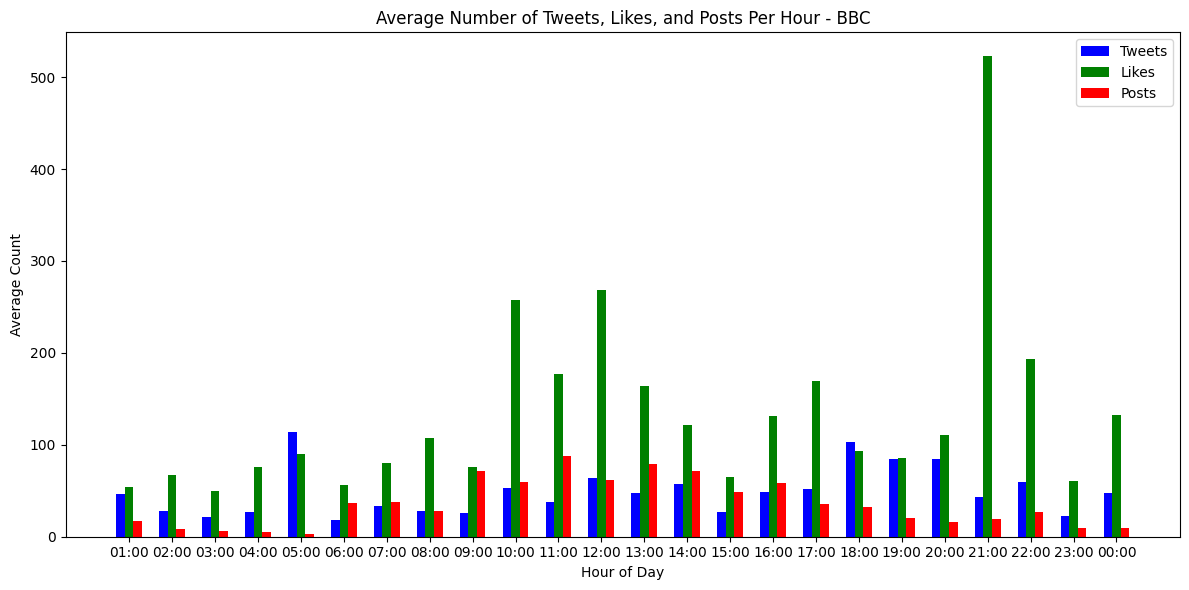

In [35]:
# Plot the metrics
plot_hourly_metrics(bbc_df, 'BBC')

## Analysis of BBC's Social Media Activity

### Key Observations

1. Daily Activity Patterns
- Clear daily cycle in social media activity
- Lowest activity: Early morning (01:00-04:00)
- Activity increases significantly from 05:00, remains high during workday

2. Peak Times
- Tweets: Highest at 05:00 (>100/hour)
- Likes: Dramatic peak at 20:00 (>500/hour)
- Posts: Most frequent 09:00-13:00, peaking at 11:00

3. Engagement Metrics
- Likes consistently outnumber tweets and posts
- Highest like-to-content ratio in evening hours

4. Content Strategy
- Content creation focus: Morning and early afternoon
- Evening: Fewer posts, much higher engagement (likes)

5. Audience Behavior
- Major engagement spike at 20:00 (post-work hours)
- Secondary engagement peak 10:00-12:00 (possible lunch break)

6. Platform Usage
- Tweets more frequent than posts
- Suggests Twitter as primary platform, use of at least one other

7. Time Zone Considerations
- Data likely reflects UK time
- Patterns align with typical UK workday and leisure hours

### Potential Strategy Implications
- Optimize content timing for peak engagement hours
- Adjust staffing to match high-activity periods
- Tailor content type to platform-specific peak times
- Consider audience behavior in different time slots for targeted content

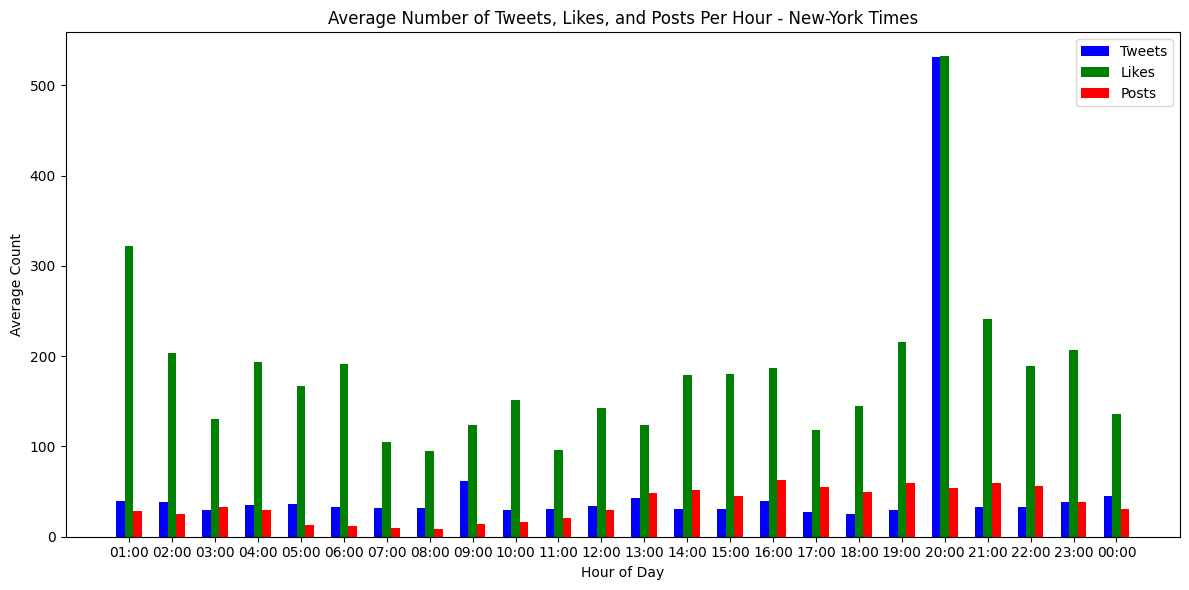

In [36]:
# Plot the metrics
plot_hourly_metrics(nyt_df, 'New-York Times')

## Analysis of New York Times' Social Media Activity

### Key Observations

1. Daily Activity Patterns
- Clear cyclical pattern in social media activity
- Lowest activity: Early morning hours (07:00-08:00)
- Activity increases significantly from 09:00, remains high throughout the day

2. Peak Times
- Tweets and Likes: Dramatic spike at 18:00 (6 PM), reaching over 500/hour
- Posts: Generally consistent throughout the day, slight increase in afternoon/evening

3. Engagement Metrics
- Likes consistently outnumber tweets and posts most hours
- Exceptionally high engagement at 18:00 for both tweets and likes

4. Content Strategy
- Relatively consistent posting frequency throughout the day
- Slight increase in posts during afternoon and evening hours
- Major spike in tweet activity at 18:00, possibly scheduled news roundup

5. Audience Behavior
- Highest engagement at 18:00, suggesting peak audience activity after work hours
- Secondary engagement peak at 01:00, possibly late-night audience

6. Platform Usage
- Similar patterns for tweets and likes, indicating strong Twitter presence
- Posts (possibly on other platforms) remain more consistent

7. Time Zone Considerations
- Data likely reflects Eastern Time (ET), given it's for the New York Times
- Patterns align with U.S. East Coast workday and leisure hours

### Potential Strategy Implications
- Capitalize on 18:00 spike for major news releases or roundups
- Consider audience segments active during late night hours
- Maintain consistent content stream throughout the day
- Explore reasons for high engagement at 18:00 to replicate success
- Adjust staffing to ensure coverage during peak activity times

In [37]:
def plot_weekly_metrics(df, df_name):
    """Plot the average number of tweets, likes, and posts per day of the week from the given DataFrame.
    
    Parameters:
    - df: DataFrame containing the data.
    - df_name: Name of the DataFrame to include in the plot title.
    """
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y · %I:%M %p %Z')
    
    # Extract the day of the week (Sunday=0, ..., Saturday=6)
    df['day_of_week'] = df['date'].dt.dayofweek
    
    def average_per_day(df, column_name):
        """Calculate the average per day of the week for a given column."""
        avg_per_day = df.groupby('day_of_week')[column_name].mean()
        return avg_per_day

    def posts_per_day(df):
        """Calculate the number of posts per day of the week."""
        posts_per_day = df.groupby('day_of_week').size()
        return posts_per_day

    # Calculate average per day of the week for tweets, likes, and posts
    avg_tweets_per_day = average_per_day(df, 'No_of_tweets')
    avg_likes_per_day = average_per_day(df, 'No_of_Likes')
    avg_posts_per_day = posts_per_day(df)

    # Ensure we have all days of the week from Sunday to Saturday
    all_days = pd.Series(range(7))
    avg_tweets_per_day = avg_tweets_per_day.reindex(all_days, fill_value=0)
    avg_likes_per_day = avg_likes_per_day.reindex(all_days, fill_value=0)
    avg_posts_per_day = avg_posts_per_day.reindex(all_days, fill_value=0)

    # Plotting the combined bar plot
    plt.figure(figsize=(12, 6))

    # Plot for tweets, likes, and posts
    plt.bar(avg_tweets_per_day.index - 0.3, avg_tweets_per_day, width=0.3, color='blue', align='center', label='Tweets')
    plt.bar(avg_likes_per_day.index, avg_likes_per_day, width=0.3, color='green', align='center', label='Likes')
    plt.bar(avg_posts_per_day.index + 0.3, avg_posts_per_day, width=0.3, color='red', align='center', label='Posts')

    plt.title(f'Average Number of Tweets, Likes, and Posts Per Day of the Week - {df_name}')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Count')
    plt.legend()

    # Format x-axis labels to show day of the week
    days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    plt.xticks(ticks=range(7), labels=days_of_week)

    plt.tight_layout()
    plt.show()

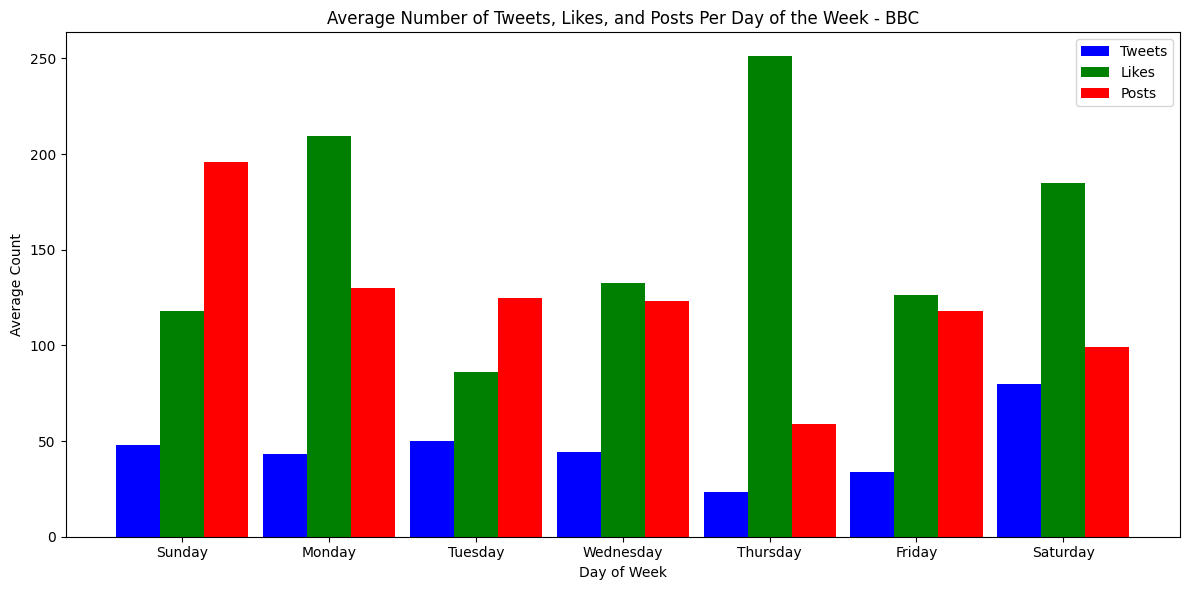

In [38]:
# Plot the metrics
plot_weekly_metrics(bbc_df, 'BBC')

### Key Observations

1. General Trends
- The BBC's social media activity varies significantly across different days of the week.
- There's no consistent pattern across all three metrics (Tweets, Likes, Posts) for any given day.

2. Tweets
- Tweets show the least variation across the week compared to Likes and Posts.
- Saturday has the highest average number of tweets (around 75).
- Thursday has the lowest average number of tweets (about 25).
- Weekdays generally show lower tweet activity compared to weekends.

3. Likes
- Likes demonstrate the highest variability among the three metrics.
- Thursday stands out with the highest average number of likes (about 250).
- Tuesday has the lowest average number of likes (less than 100).
- No clear pattern between weekdays and weekends for likes.

4. Posts
- Posts show moderate variability throughout the week.
- Sunday has the highest average number of posts (nearly 200).
- Thursday has the lowest average number of posts (around 60).
- Weekends (especially Sunday) seem to have higher posting activity.

5. Day-specific Insights
- Sunday: Highest posting activity, moderate likes, average tweets.
- Monday: Second-highest likes, above-average posts, below-average tweets.
- Thursday: Highest likes, lowest posts, lowest tweets - an interesting anomaly.
- Saturday: Highest tweets, above-average likes and posts.

### Potential Insights and Questions

1. Why does Thursday have such high likes despite low tweet and post numbers? Is there a specific content strategy for Thursdays?

2. The BBC seems to be most active in posting on Sundays. Is this related to weekly news cycles or audience engagement patterns?

3. The disconnect between posting frequency and likes suggests that content quality or type may be more important than quantity in driving engagement.

4. The relatively consistent tweet numbers across the week might indicate an automated or scheduled tweeting strategy.

5. The variation in activity across different metrics and days suggests the BBC might be tailoring its strategy for each platform and day of the week.

### Limitations and Further Analysis

- This data represents averages, so it doesn't capture potential variations due to specific events or seasons.
- Information about the types of content posted on different days would provide more context.
- Engagement rates (likes per post, for example) would offer additional insights into effectiveness.
- Data on other metrics like sha

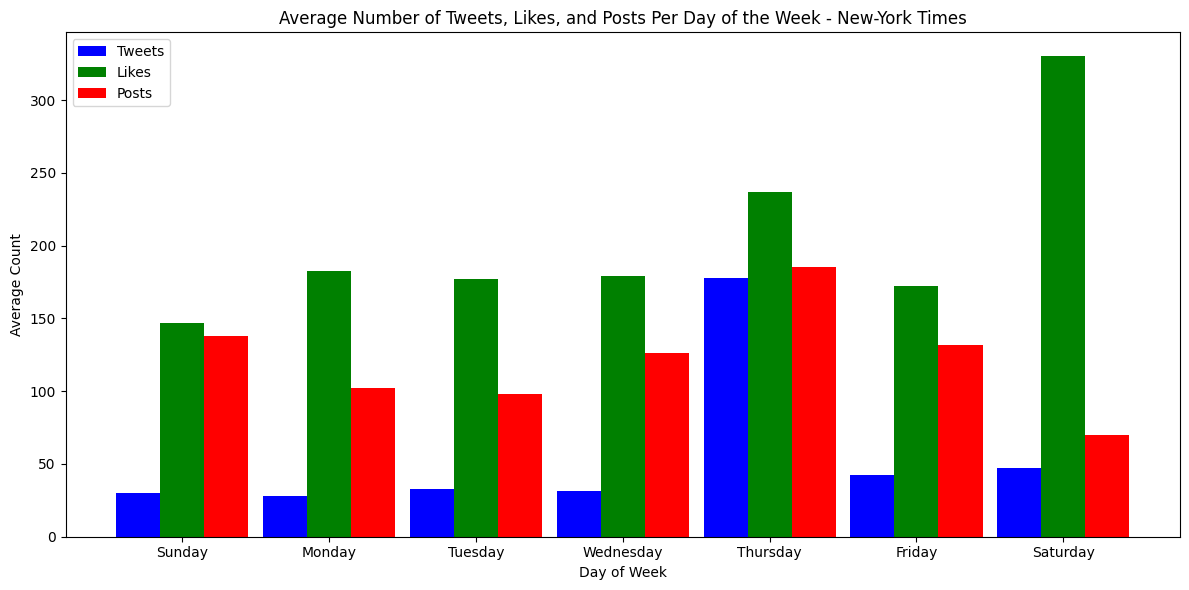

In [39]:
# Plot the metrics
plot_weekly_metrics(nyt_df, 'New-York Times')

### Key Observations

1. General Trends
- The New York Times' social media activity varies significantly across different days of the week.
- There's a noticeable pattern of higher activity on certain days, particularly Thursday and Saturday.

2. Tweets
- Tweets show moderate variation across the week.
- Thursday has the highest average number of tweets (around 175).
- Sunday through Wednesday have the lowest tweet activity (about 25-30 tweets).
- There's a clear increase in tweeting activity from Thursday to Saturday.

3. Likes
- Likes demonstrate the highest values and variability among the three metrics.
- Saturday stands out with the highest average number of likes (over 300).
- Thursday has the second-highest number of likes (about 240).
- Sunday has the lowest average number of likes (around 150).
- There's a general trend of increased likes towards the end of the week.

4. Posts
- Posts show moderate variability throughout the week.
- Thursday has the highest average number of posts (about 180).
- Saturday has the lowest average number of posts (around 70).
- Weekdays generally have higher posting activity compared to weekends.

5. Day-specific Insights
- Thursday: Peak activity across all metrics - highest tweets and posts, second-highest likes.
- Saturday: Highest likes, but lowest posts and moderate tweets.
- Sunday-Wednesday: Relatively consistent low tweet activity, varying posts and likes.
- Friday: Shows a dip in activity compared to Thursday and Saturday.

### Potential Insights and Questions

1. Why is Thursday such a high-activity day across all metrics? Is this related to content strategy or audience behavior?

2. The contrast between Saturday's high likes and low posts suggests highly engaging content. What type of content is posted on Saturdays?

3. The consistent low tweet activity from Sunday to Wednesday, despite varying posts, might indicate a focus on other platforms during these days.

4. Friday shows an unexpected dip in activity. Is this intentional or a result of audience engagement patterns?

5. The general increase in activity towards the end of the week could be aligned with building anticipation for weekend content or news cycles.

### Limitations and Further Analysis

- This data represents averages, so it doesn't capture variations due to specific events, breaking news, or seasonal trends.
- Information about the types of content posted on different days would provide more context for the engagement patterns.
- Engagement rates (likes per post or per tweet) would offer insights into content effectiveness across days.
- Data on other metrics like shares, comments, or click-throughs would provide a more comprehensive view of engagement.
- Comparison with competitor data (e.g., other major news outlets) could offer industry benchmarks.

### Comparison to BBC (Previous Analysis)
- The New York Times shows more pronounced day-of-week patterns than the BBC.
- Thursday is a high-activity day for both, but the NYT shows a more dramatic peak.
- The NYT has higher overall numbers for likes compared to the BBC.
- The NYT's weekend strategy seems different, with high likes but low posts on Saturday, contrasting with the BBC's high Sunday activity.

# Sentiment Analysis

In [40]:
import matplotlib.pyplot as plt
from transformers import pipeline

import matplotlib.pyplot as plt
from transformers import pipeline

def sent_analysis(corpus1, user1, corpus2, user2):
    sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device='cuda')

    def analyze_sentiments(corpus):
        sentiments = [sentiment_analyzer(sentence)[0] for sentence in corpus]
        positive_count = sum(1 for sentiment in sentiments if sentiment['label'] == 'POSITIVE')
        negative_count = sum(1 for sentiment in sentiments if sentiment['label'] == 'NEGATIVE')
        total_count = len(corpus)
        positive_percentage = (positive_count / total_count) * 100
        negative_percentage = (negative_count / total_count) * 100
        return positive_percentage, negative_percentage

    positive1, negative1 = analyze_sentiments(corpus1)
    positive2, negative2 = analyze_sentiments(corpus2)

    # Report the statistics of the sentiment distribution for both corpora
    print(f"\nSentiment distribution in {user1}'s corpus:")
    print(f"Positive: {positive1:.2f}%")
    print(f"Negative: {negative1:.2f}%")
    
    print(f"\nSentiment distribution in {user2}'s corpus:")
    print(f"Positive: {positive2:.2f}%")
    print(f"Negative: {negative2:.2f}%")

    # Create bar plot for sentiment distribution
    labels = ['Positive', 'Negative']
    percentages1 = [positive1, negative1]
    percentages2 = [positive2, negative2]
    
    x = range(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 7))
    bars1 = ax.bar([p - width/2 for p in x], percentages1, width, label=user1, color='blue')
    bars2 = ax.bar([p + width/2 for p in x], percentages2, width, label=user2, color='red')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Sentiment Distribution of tweets for {user1} and {user2}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 100)
    ax.legend()

    # Add percentage labels on top of the bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.show()



07-Aug-24 12:14:25 - From c:\Users\Idan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Sentiment distribution in BBC's corpus:
Positive: 33.53%
Negative: 66.47%

Sentiment distribution in New-York Times's corpus:
Positive: 48.88%
Negative: 51.12%


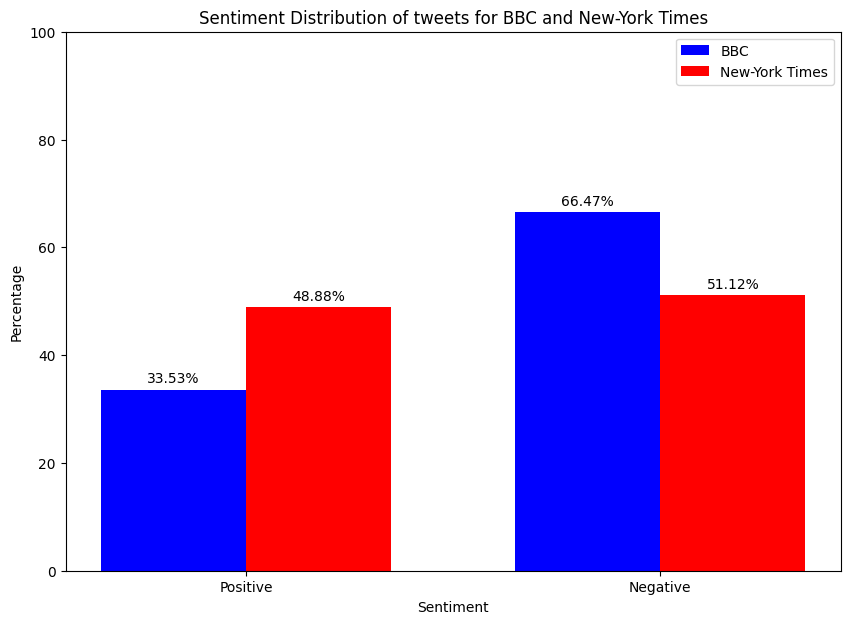

In [41]:
sent_analysis(bbc_corpus, 'BBC', nyt_corpus, 'New-York Times')


## Conclusions from Tweet Sentiment Analysis

### Data Summary
- BBC: 33.53% positive, 66.47% negative
- New York Times: 48.86% positive, 51.12% negative

### Key Findings

1. **Sentiment Distribution**
   - BBC tweets are predominantly negative (2:1 ratio)
   - NYT tweets are nearly balanced between positive and negative

2. **Comparative Analysis**
   - NYT tweets are 15.33% more positive than BBC tweets
   - BBC tweets are 15.35% more negative than NYT tweets

3. **Ratios**
   - BBC positive/negative ratio: 0.50
   - NYT positive/negative ratio: 0.96

### Interpretations

- BBC focuses more on negative or critical news
- NYT maintains a more balanced sentiment in tweets
- Differences may reflect:
  - Editorial choices
  - Nature of current events
  - Cultural factors (British vs American perspectives)

### Implications

The sentiment patterns reveal distinct approaches to social media content
between BBC and NYT, potentially reflecting broader editorial strategies
or differences in news focus between the two organizations.

# Summarization

In [69]:
import logging
from tqdm import tqdm

# Set the logging level to ERROR to suppress warnings
logging.getLogger("transformers").setLevel(logging.ERROR)

summarizer = pipeline("summarization", model="sshleifer/distilbart-xsum-12-1", device='cuda')

def summarize_corpus(corpus, max_length=130, min_length=4):
    summaries = []
    for doc in tqdm(corpus):
        summary = summarizer(doc, max_length= max_length , min_length=min_length, do_sample=False)[0]['summary_text']
        summaries.append(summary)

    return summaries

def print_summary(corpus):
    summaries = summarize_corpus(corpus)
    print()

    for i, summary in enumerate(summaries):
        print(f"Summary {i}: {summary}")

In [72]:
print_summary(bbc_corpus)

  0%|          | 0/850 [00:00<?, ?it/s]c:\Users\Idan\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\modeling_attn_mask_utils.py:445: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  or (hasattr(torch, "_dynamo") and torch._dynamo.is_compiling())
c:\Users\Idan\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\modeling_attn_mask_utils.py:369: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  or (hasattr(torch, "_dynamo") and torch._dynamo.is_compiling())
c:\Users\Idan\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\modeling_attn_mask_utils.py:259: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  or (hasattr(torch, "_dynamo") and torch._dynamo.is_compiling())
100%|██████████| 850/850 [02:21<00:00,  6.01it/s]


Summary 0:  The BBC News NI NI
Summary 1:  The Grimsby
Summary 2:  The BBC has learned that the weekend of violence in north Belfast.
Summary 3:  Scotland's energy secretary has given birth to a baby boy.
Summary 4: Shares in the US have fallen sharply following a global sell-off.
Summary 5:  A new housing scheme has been set up to £1.
Summary 6:  A new way to protect birds from endangered birds.
Summary 7:  A charity worker has been arrested on suspicion of attempted murder.
Summary 8:  Irish gymnast Rhys McClay has won gold at the European Gymnastics Championships in London.
Summary 9:  Olympic gold medallist and singer Taylor Swift have won gold at the 2016 Olympics in Los Angeles.
Summary 10:  The final day of the Olympic Games in Paris.
Summary 11:  A 12-year-old boy who drowned while on holiday in a school trip has been named.
Summary 12:  The mother of a 15-year-old boy who was shot dead at the age of 16.
Summary 13:  A bus fire has broken out in the West Midlands.
Summary 14: 

In [73]:
print_summary(nyt_corpus)

  0%|          | 0/851 [00:00<?, ?it/s]c:\Users\Idan\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\modeling_attn_mask_utils.py:445: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  or (hasattr(torch, "_dynamo") and torch._dynamo.is_compiling())
c:\Users\Idan\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\modeling_attn_mask_utils.py:369: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  or (hasattr(torch, "_dynamo") and torch._dynamo.is_compiling())
c:\Users\Idan\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\modeling_attn_mask_utils.py:259: FutureWarning: `torch._dynamo.external_utils.is_compiling` is deprecated. Use `torch.compiler.is_compiling` instead.
  or (hasattr(torch, "_dynamo") and torch._dynamo.is_compiling())
100%|██████████| 851/851 [02:16<00:00,  6.25it/s]


Summary 0:  The New York Times.
Summary 1:  BBC Sport has apologised for mistakes after the start of the men's 100m final at the Rio Olympics.
Summary 2:  gymnastics can be more enjoyable.
Summary 3:  US basketball star Noah Lyles has been given a warm-up by his fellow American team.
Summary 4:  Great Britain have set a new world record for the women's team sprint at the Rio Olympics.
Summary 5:  The United States has won bronze in the women's gymnastics floor at the Paris Olympics.
Summary 6: Boston is one of the most senior Roman Catholic priests.
Summary 7: Brazil, the world's gymnastics floor at the Rio Olympics.
Summary 8:  US rapper Flava Flav has become the first man to win the Olympic women's water polo team.
Summary 9:  The "squad" of the "squar" in the US state of Missouri, is facing a tough battle for presidential elections.
Summary 10:  British cyclist Noah Lyles has become the first man to win the Paris Grand Prix.
Summary 11:  Two people have been killed in the US after 

# Predict next word with RNN

In [118]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

def train_rnn_model(corpus, max_words=10000, max_sequence_length=50, embedding_dim=100):
    # Tokenize and prepare sequences
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(corpus)
    sequences = tokenizer.texts_to_sequences(corpus)
    
    # Create input and output sequences
    input_sequences = []
    for seq in sequences:
        for i in range(1, len(seq)):
            input_sequences.append(seq[:i+1])
    
    # Pad sequences
    input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
    
    # Create predictors and labels
    X, y = input_sequences[:,:-1], input_sequences[:,-1]
    y = to_categorical(y, num_classes=max_words)
    
    # Build the RNN model
    model = Sequential([
        Embedding(max_words, embedding_dim),
        SimpleRNN(128, return_sequences=False),
        Dense(max_words, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X, y, epochs=10, verbose=1)
    
    return model, tokenizer

def predict_next_words(model, tokenizer, text, num_words=5, max_sequence_length=50):
    # Prepare the input text
    sequences = tokenizer.texts_to_sequences([text])
    sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')
    
    # Predict the next words
    predicted_words = []
    for _ in range(num_words):
        pred_probs = model.predict(sequences, verbose=0)
        pred_word_index = np.argmax(pred_probs, axis=1)[0]
        pred_word = tokenizer.index_word.get(pred_word_index, '')
        if not pred_word:
            break
        predicted_words.append(pred_word)
        sequences = np.roll(sequences, shift=-1)
        sequences[0, -1] = pred_word_index
    
    # Combine input text with predicted continuation
    return text + ' ' + ' '.join(predicted_words)



big_corpus = []
big_corpus.extend(bbc_corpus)
big_corpus.extend(nyt_corpus)

model, tokenizer = train_rnn_model(big_corpus)



Epoch 1/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.0438 - loss: 7.9249
Epoch 2/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.0722 - loss: 6.9612
Epoch 3/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.0990 - loss: 6.3317
Epoch 4/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.1443 - loss: 5.6351
Epoch 5/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.1784 - loss: 5.2149
Epoch 6/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.2352 - loss: 4.4997
Epoch 7/10
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.3102 - loss: 3.8976
Epoch 8/10
 724/1061 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4159 - loss: 3.2384

In [114]:
text_to_complete = "woman"

print("The text to complete: ", text_to_complete)
print("The completed text:" ,predict_next_words(model, tokenizer, text_to_complete))

The text to complete:  woman
The completed text: woman dies after hospital crash https


<method-wrapper '__setattr__' of list object at 0x0000020D80E1FAC0>

# GPT

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def predict_with_gpt(corpus, input_text, max_length=50, model_name='gpt2'):
    # Load pre-trained GPT model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)
    
    # Prepare the input text
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    
    # Generate text continuation
    output = model.generate(input_ids, max_length=len(input_ids[0]) + max_length, num_return_sequences=1, 
                            pad_token_id=tokenizer.eos_token_id, no_repeat_ngram_size=2)
    
    # Decode the generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    
    return generated_text

# Example usage:
corpus = ["This is the first document.", "And here is the second document.", "Finally, this is the third document."]
input_text = "This is the"
output = predict_with_gpt(corpus, input_text)
print(output)